Using the Iris dataset, plot the dataset in 2D and compare PCA and tSNE. Plot the points using colors associated to real classes.

Try different clustering algorithms (partitionning, hierarchical and density based).

For each algorithm, plot the result in 2D with colors associated to real classes and shapes associated to the found clusters.

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
from sklearn import metrics
from sklearn import manifold
from sklearn import datasets
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import time
from sklearn.cluster import AgglomerativeClustering
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import DBSCAN



<h1>Dimension Reduction </h1>

PCA and tSNE are Unsupervised methods of Dimension reduction. 

<h3>PCA</h3> 
Analysis of the variance-covariance matrix, and is often seen as a form of pre-processing. PCA is comprised of the original variables: 
X1 to Xp, Principle Components: C1 to Ck,..., Cq with q≤ p.

Ck and Cj are not correlated.
Maximum Variance and Decreasing Importance.

Σ : variance covariance matrix, positive definite (real igenvalues), these Eigen values are in decreasing order of the most important to the least. 

projected variance : σv2 = vTΣv = vT λv = λ

with v - eigen values

    Highest variance is the highest lambda value 
    
    variance tr(Σ) = σ2 = sum (λi)i=1


In [12]:
iris = datasets.load_iris()
#print(iris)
namesIris=list(iris.target_names)
print(namesIris)


# Information on the Iris DataSet 


"""3 classes
     Samples per class 50
     Total samples 150 
     Dimensionality 4
     Features real, positive"""

['setosa', 'versicolor', 'virginica']


'3 classes\n     Samples per class 50\n     Total samples 150 \n     Dimensionality 4\n     Features real, positive'

In [13]:
X = iris.data#[:, :2] #we only take the first two features.
y = iris.target
print(y)
print(X[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[5.1 3.5 1.4 0.2]


In [14]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

In [15]:
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

([], [])

In [16]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
print(X_reduced[0])

# Compared to the print values of X, it is
# apperent that there is one less dimension
# in the printed X_reduced variable. 
# These are eigen values listed in
# decreasing importance
# - sepal length in cm\n      
# - sepal width in cm\n       
# - petal length in cm\n       
# - petal width in cm\n


[-2.68412563  0.31939725 -0.02791483]


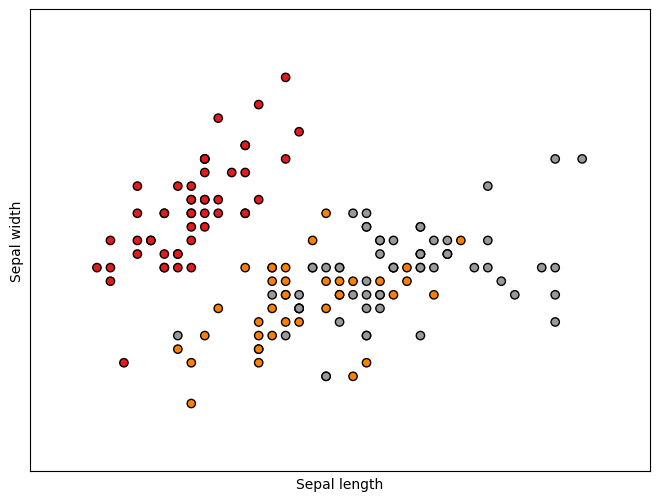

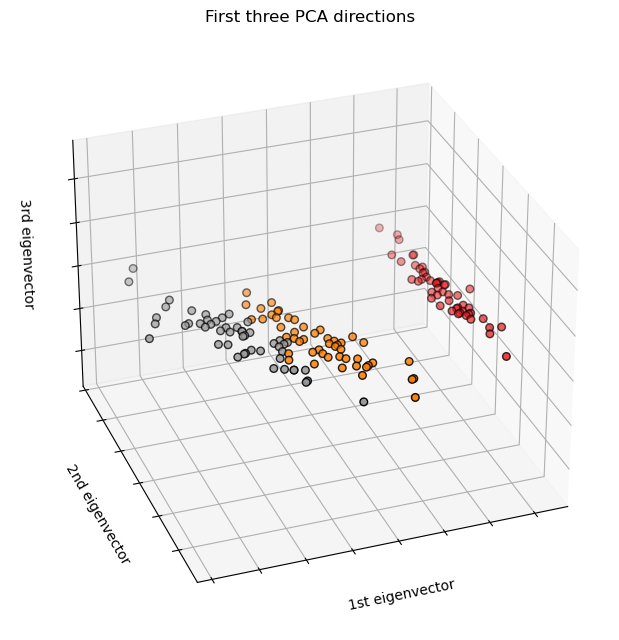

In [17]:
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    #X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=30,
)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

# this shows two charts one in 2D showing 
# the clusters of the features

<h3> tSNE </h3>
tSNE : t-distributed Stochastic Neighbor Embedding

t-SNE builds a map in which distances between points reflect similarities in the data. You should try to avoid having all points collapse. ( Typical map structure: 2 or 3)

This is a form of non-linear dimension reduction, similar pioints in the original space will be represented by nearby reduced dimension coordinates and dissimilar points will be represented by distance reduced dimension coordinates

This is very computationally expensive compared to the PCA

Stochastic Algorithm, restarts with different seeds produce different results.

<h4>Parameters </h4> 

1) Perplexity (between 5 and 50) - 

2) Early Exageration factor -

3) Learning rate ( not too small or large) -

4) Maximum number of iterations -

5) Angle - 


In [118]:
tsne = manifold.TSNE(n_components=3, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)
print(X_tsne[0])

/Users/taylorlucero/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/taylorlucero/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[-61.474754   77.27131    12.9027405]


In [119]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)

In [120]:
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=30,
)
ax.set_title("First three PCA directions: PCA")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])


[Text(-0.8, 0.0560196167842589, ''),
 Text(-0.6000000000000001, 0.041010027712060276, ''),
 Text(-0.4, 0.026250330782682636, ''),
 Text(-0.19999999999999996, 0.011734336897902813, ''),
 Text(0.0, -0.002543940332822381, ''),
 Text(0.19999999999999996, -0.01659029282390355, ''),
 Text(0.40000000000000013, 0, ''),
 Text(0.6000000000000001, 0, ''),
 Text(0.8, 0, ''),
 Text(1.0, 0, '')]

In [121]:
figtSNE = plt.figure(2, figsize=(8, 6))
axtSNE = Axes3D(figtSNE, elev=-150, azim=110)
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")

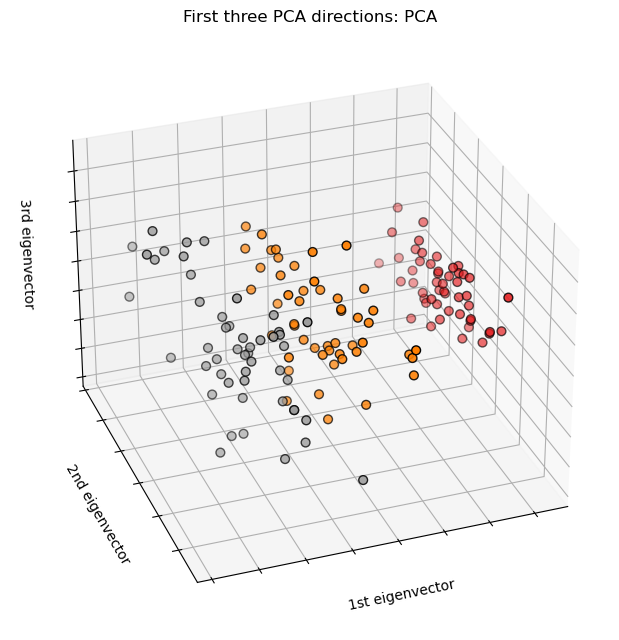

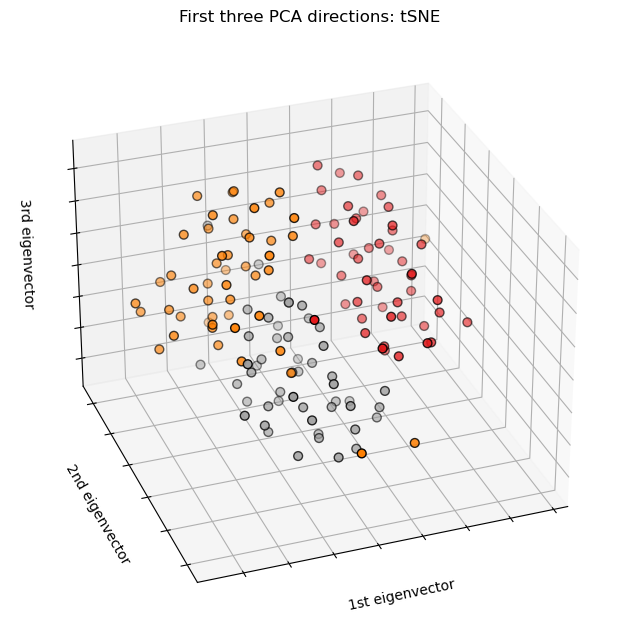

In [122]:
axtSNE.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    X_tsne[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
axtSNE.set_title("First three PCA directions: tSNE")
axtSNE.set_xlabel("1st eigenvector")
axtSNE.w_xaxis.set_ticklabels([])
axtSNE.set_ylabel("2nd eigenvector")
axtSNE.w_yaxis.set_ticklabels([])
axtSNE.set_zlabel("3rd eigenvector")
axtSNE.w_zaxis.set_ticklabels([])

plt.show()

<h1>PCA vs tSNE </h1> 

<h1>Clustering </h1>

Unsurpervised Learning method, that does not require class labels
as they are found directly from the data.

Cluster: A collection of data objects

Similar objects are grouped together into the same cluster, while those dissimlar are grouped into other clusters.

Calculate object similarity/ distance
1)Minkowski Distance
    a)Manhattan Distance
    b) Euclidean Distance

<h3>partitionning </h3>
Iterative Construction of Partitions 
Examples: K-means, K-mediods


<h3>hierarchical  </h3>
Constructs a dendrogram of instances 
Examples: Diana, Birch, Rock, Cameleon

<h3>density based </h3>
Based on Connectivity and density function
Examples: DBSCAN, OPTICS, DenClue 

<H3>Partitionning </H3>
Iterative Construction of Partitions 
Examples: K-means, K-mediods
    
    Method: Construct a partition of a dataset D of n objects into 
        a set of k clusters, minimizing the sum of squared distances:
            
        Given a k (cluster) that optimizes the chosen partitioning
        criterion.
        - enumerate all partitions
        -  heuristic methods : k-means and k-mediod 
            
    A Centroid, a representative position between all points in 
    a dataset. Traditionally, k data points from a given dataset 
    are randomly chosen as cluster centers, or centroids, and all 
    training instances are plotted and added to the closest cluster. 
    After all instances have been added to clusters, the centroids, 
    representing the mean of the instances of each cluster are re-calculated,
    with these re-calculated centroids becoming the new centers of 
    their respective clusters. (Iterative process)

    Convergence in k-means : k-means clustering aims to converge on an optimal 
    set of cluster centers (centroids) and cluster membership based on 
    distance from these centroids via successive iterations, it is intuitive 
    that the more optimal the positioning of these initial centroids, the fewer 
    iterations of the k-means clustering algorithms will be required
    for convergence.

    
            
    A mediod is a representative object in a dataset or cluster
    whose sum of dissimilartites to all the objects in the cluster is 
    minimal.
        - Similar to means and centroids, but are always member s
        of the dataset.
        - There can be more than on mediod, as with medians
        
    K-mediods clustering alg: similar to the k-means but used 
        when the mean or centroid is not definable.
        1) a set of mediods is chosen at random.
        2) Distance to the other points(mediods) are computed
        3) Data are clustered according to the mediod they
        are most similar to. 
        4) optimized through iterative processes 
    

In [47]:
# iris dataset was already previously loaded into X and Y
estimators=["k_means_iris_8", KMeans(n_clusters=8)]
  

In [48]:
fignum = 1
title = "8 clusters"
fig = plt.figure(fignum, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
est.fit(X)
labels = est.labels_
    
    

In [49]:
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title(titles[fignum - 1])
ax.dist = 12
fignum = fignum + 1


In [50]:
fig = plt.figure(fignum, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="k"),
    )
print(y)
print(y.astype(int))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


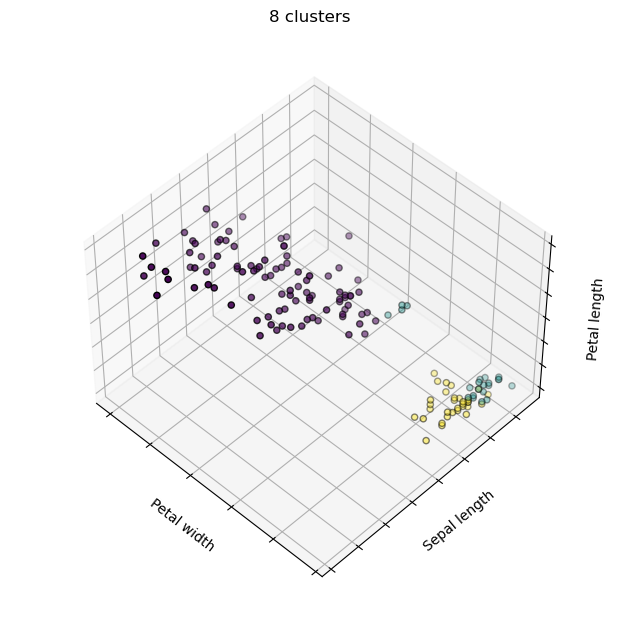

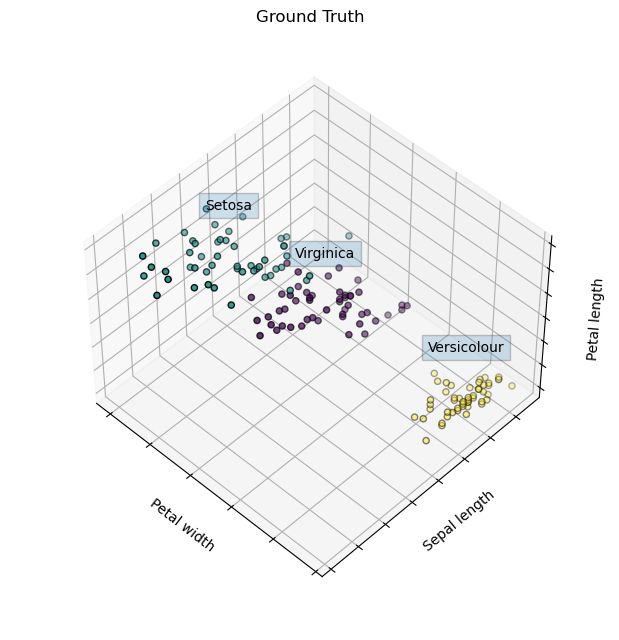

In [51]:
# Reorder the labels to have colors matching the cluster results
y = np.choose(y.astype(int), [1, 2, 0]).astype(float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")
ax.dist = 12

plt.show()

<h3> hierarichal clustering </h3>

An algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

How it works:

1) starts by treating each observation as a separate cluster. 
2) Then, it repeatedly executes the following two steps:
    a) Identify the two clusters that are closest together
    b)Merge the two most similar clusters 
    
3) Iterate until clusters are merged


Main output is a Dendrogram showing heirarchical relationships between the clusters

<h4> Measures of distance </h4>

Euclidean - Usual square distance between the two vectors

Maximum - Maximum distance between two components of x and y 

Minkowski - The p norm, the pth root of the sum of the pth powers of the differences of the components.

Manhattan - Absolute distance between the two vectors


<h4> Linkage Criteria </h4>

Single Linkage - minimizes the distance between the closest observations of pairs of clusters.

Average Linkage - minimizes the average of the distances between all observations of pairs of clusters.

Maximum Linkage - minimizes the maximum distance between observations of pairs of clusters.

Ward Linkage - minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

In [58]:
# Clustering using ward


print("Compute unstructured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print("Elapsed time: %.2fs" % elapsed_time)
print("Number of points: %i" % label.size)

Compute unstructured hierarchical clustering...
Elapsed time: 0.00s
Number of points: 150


In [59]:
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.scatter(
        X[label == l, 0],
        X[label == l, 1],
        X[label == l, 2],
        color=plt.cm.jet(float(l) / np.max(label + 1)),
        s=20,
        edgecolor="k",
    )
plt.title("Without connectivity constraints (time %.2fs)" % elapsed_time)

Text(0.5, 0.92, 'Without connectivity constraints (time 0.00s)')

In [60]:
connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)

In [61]:
print("Compute structured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(
    n_clusters=6, connectivity=connectivity, linkage="ward"
).fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print("Elapsed time: %.2fs" % elapsed_time)
print("Number of points: %i" % label.size)

Compute structured hierarchical clustering...
Elapsed time: 0.02s
Number of points: 150


/Users/taylorlucero/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:280: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


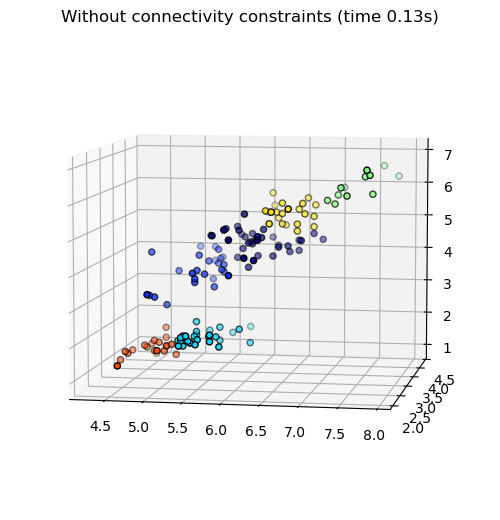

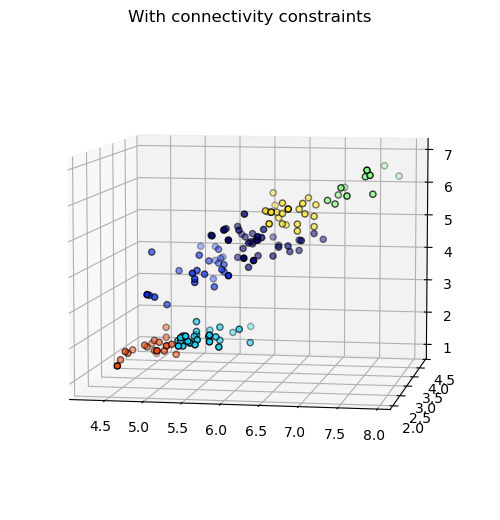

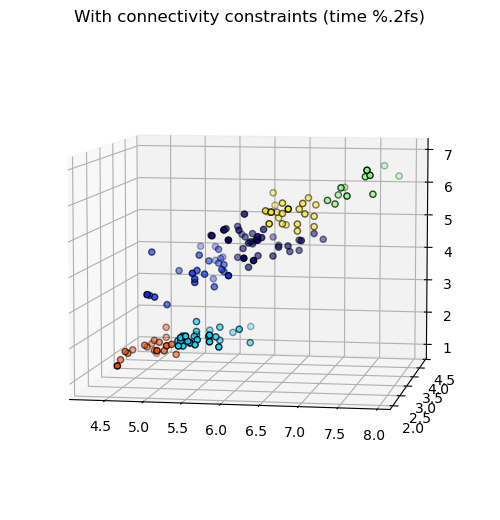

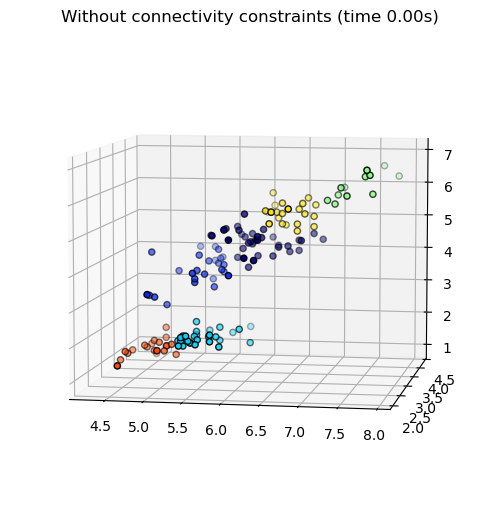

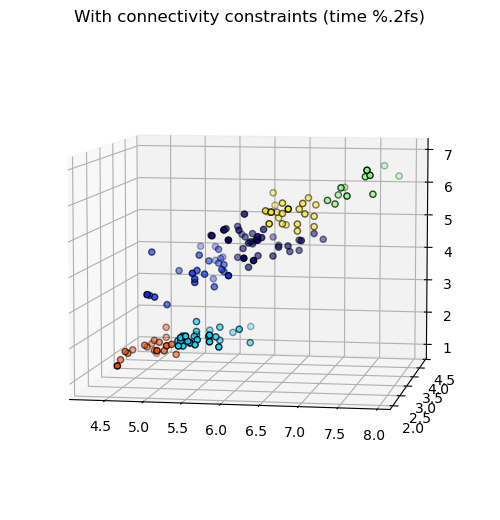

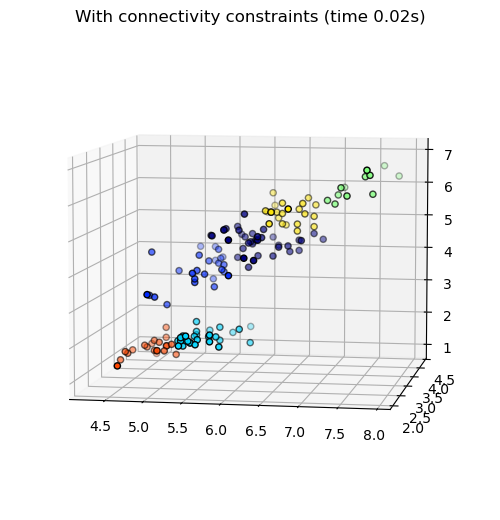

In [63]:
# Plot result
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.scatter(
        X[label == l, 0],
        X[label == l, 1],
        X[label == l, 2],
        color=plt.cm.jet(float(l) / np.max(label + 1)),
        s=20,
        edgecolor="k",
    )
plt.title("With connectivity constraints (time %.2fs)" %elapsed_time) # needs the %

plt.show()

<H3> Density Based Clustering </H3> 

Clusters: ares of high density seperated by areas of low density 

Clustering based on density (local cluster criterion), such as density.

Major Features : 

1) Discover clusters of arbitrary shape 
2) Handle noise
3) One scan 
4) Need Density parameters as a termination condition

Basic Concepts: 

Two Parameters: 

e : Maximum radius of the neighborhood 

MinPts: Minimum number of points in an 
e-neighberhood of that point

Neighborhood - 
The general idea behind ɛ-neighborhoods is given a data point, we want to be able to reason about the data points in the space around it. Formally, for some real-valued ɛ > 0 and some point p, the ɛ-neighborhood of p is defined as the set of points that are at most distance ɛ away from p.

In 2D space, the ɛ-neighborhood of a point p is the set of points contained in a circle of radius ɛ, centered at p. In 3D space, the ɛ-neighborhood is a sphere of radius ɛ, centered at p, and in higher dimensional space, the ɛ-neighborhood is just the N-sphere of radius ɛ, centered at p.


Core point - if at least MinPts points are within distance ε of p (including p).

Directly Density reachable :An object (or instance) q is directly density reachable from object p if q is within the ε-Neighborhood of p and p is a core object. ( density reachable (q to p), density connected(q to b to p))

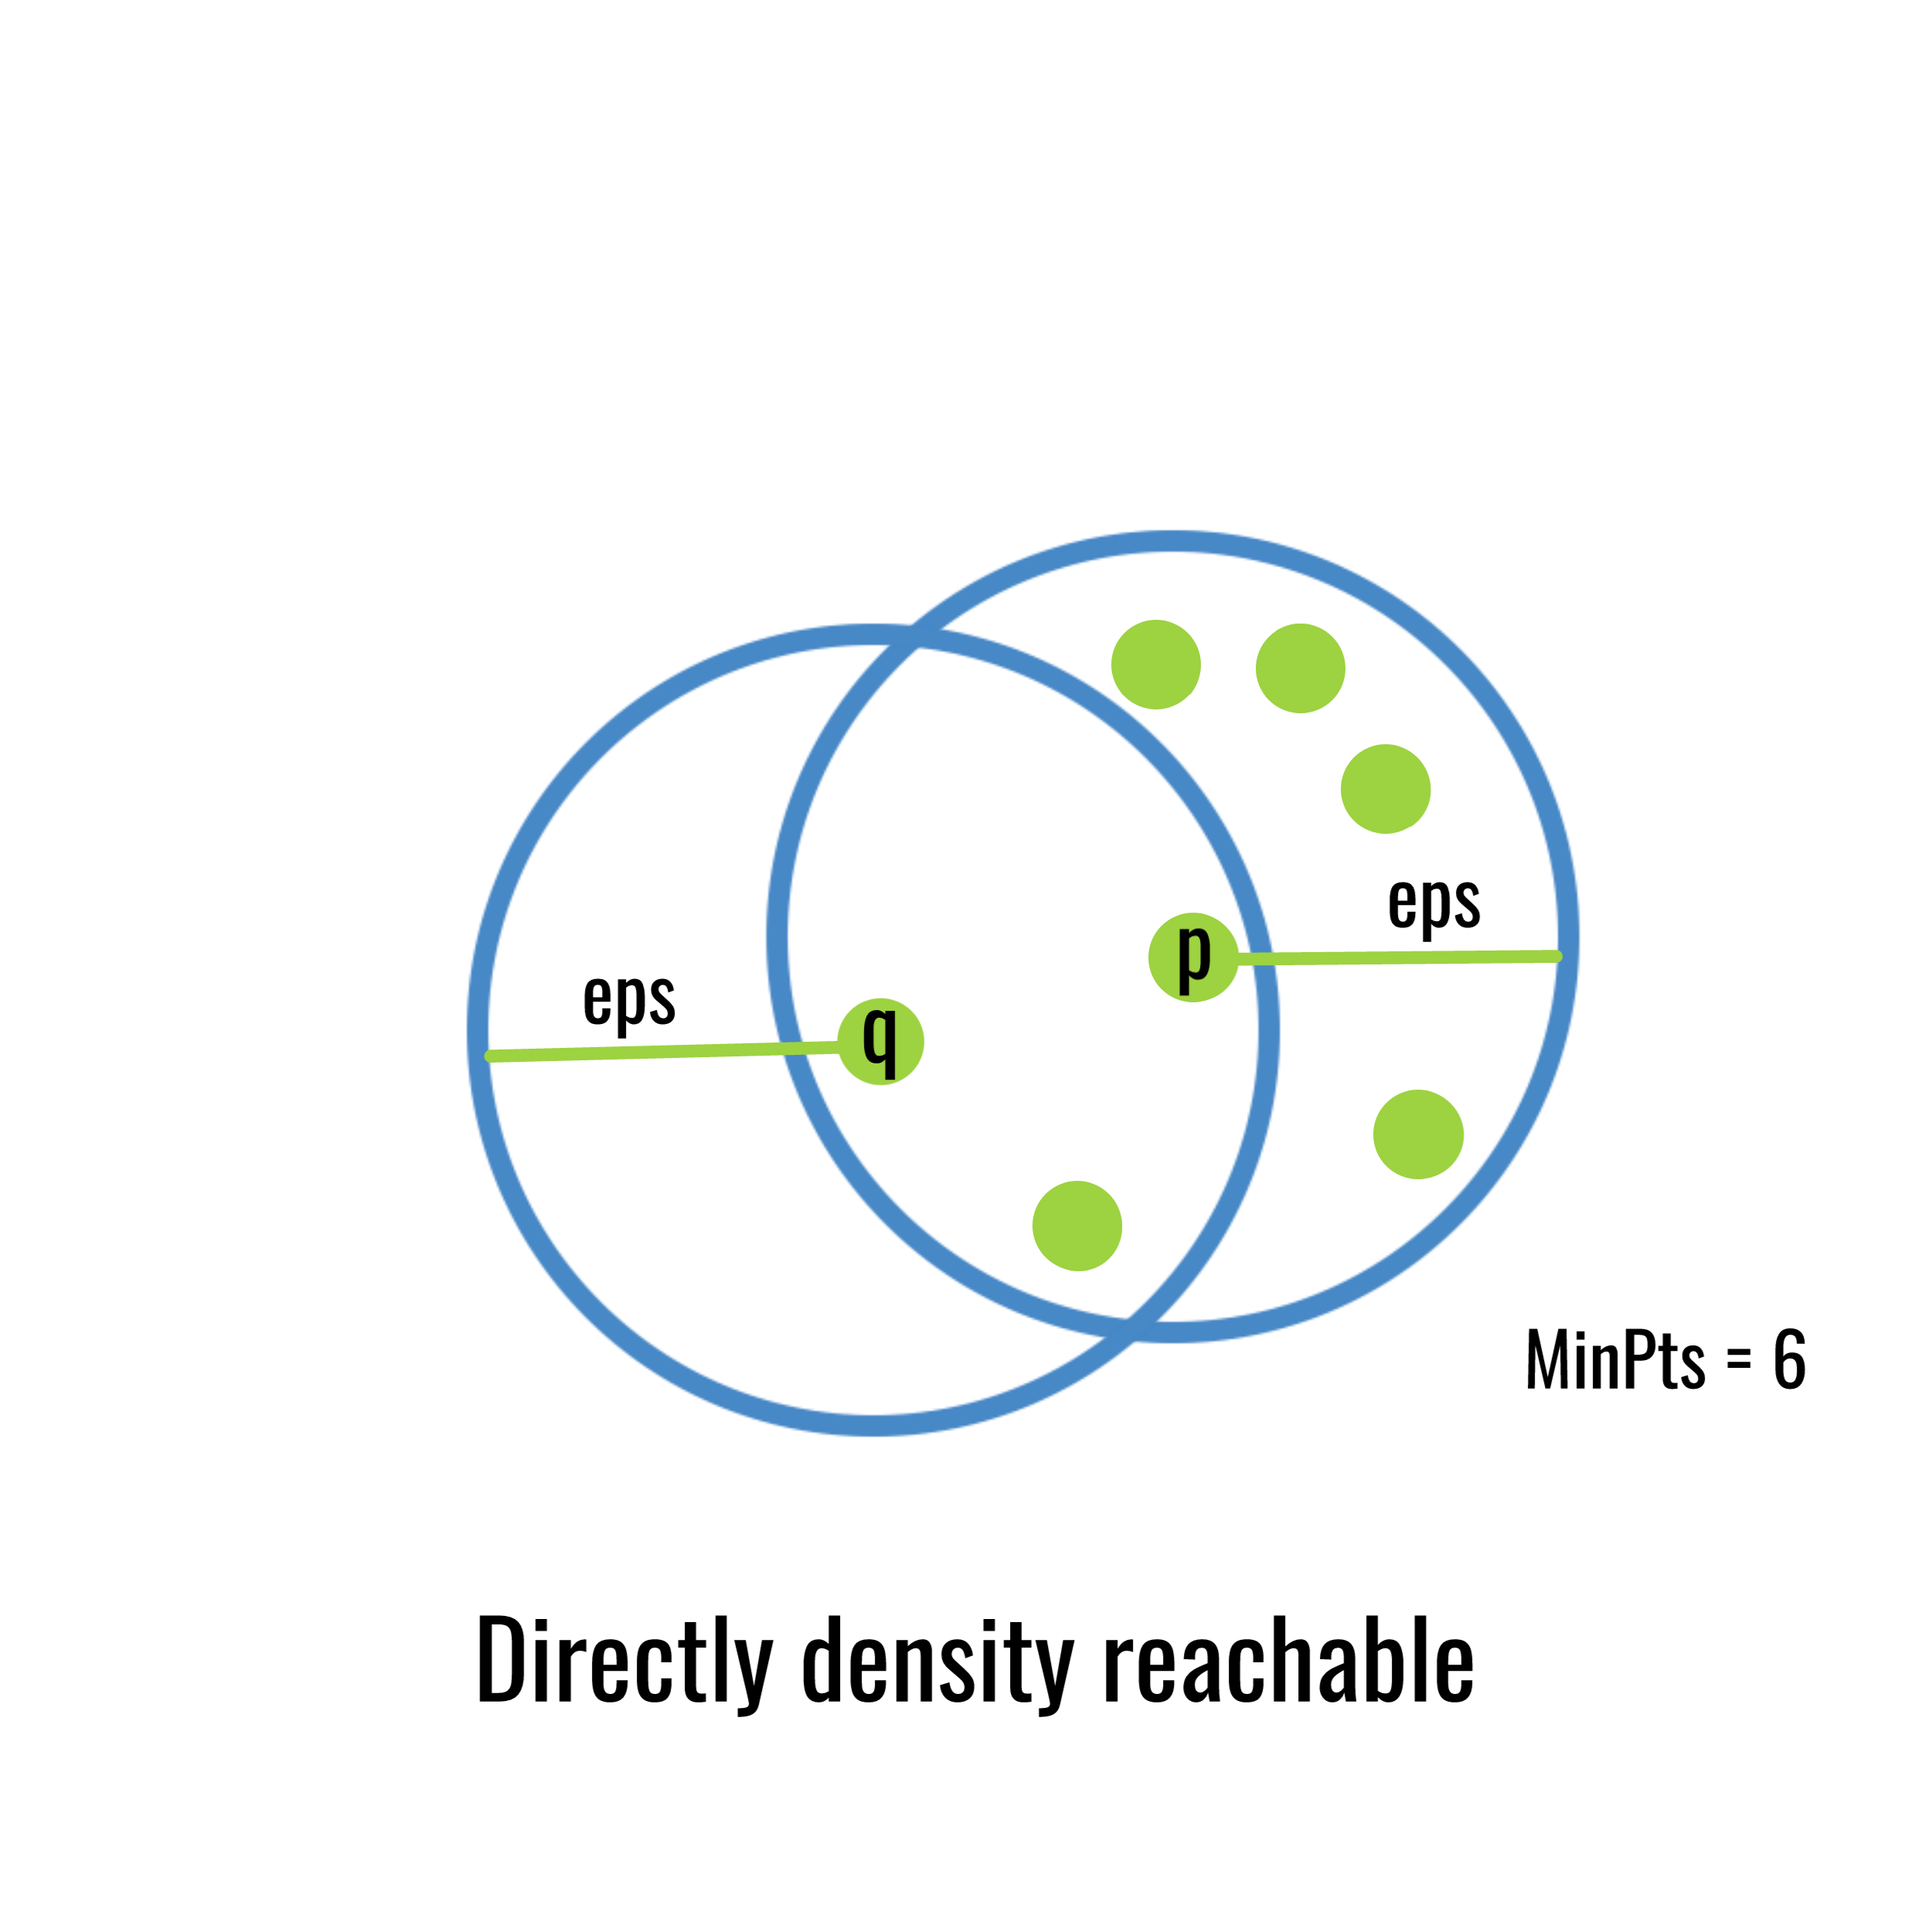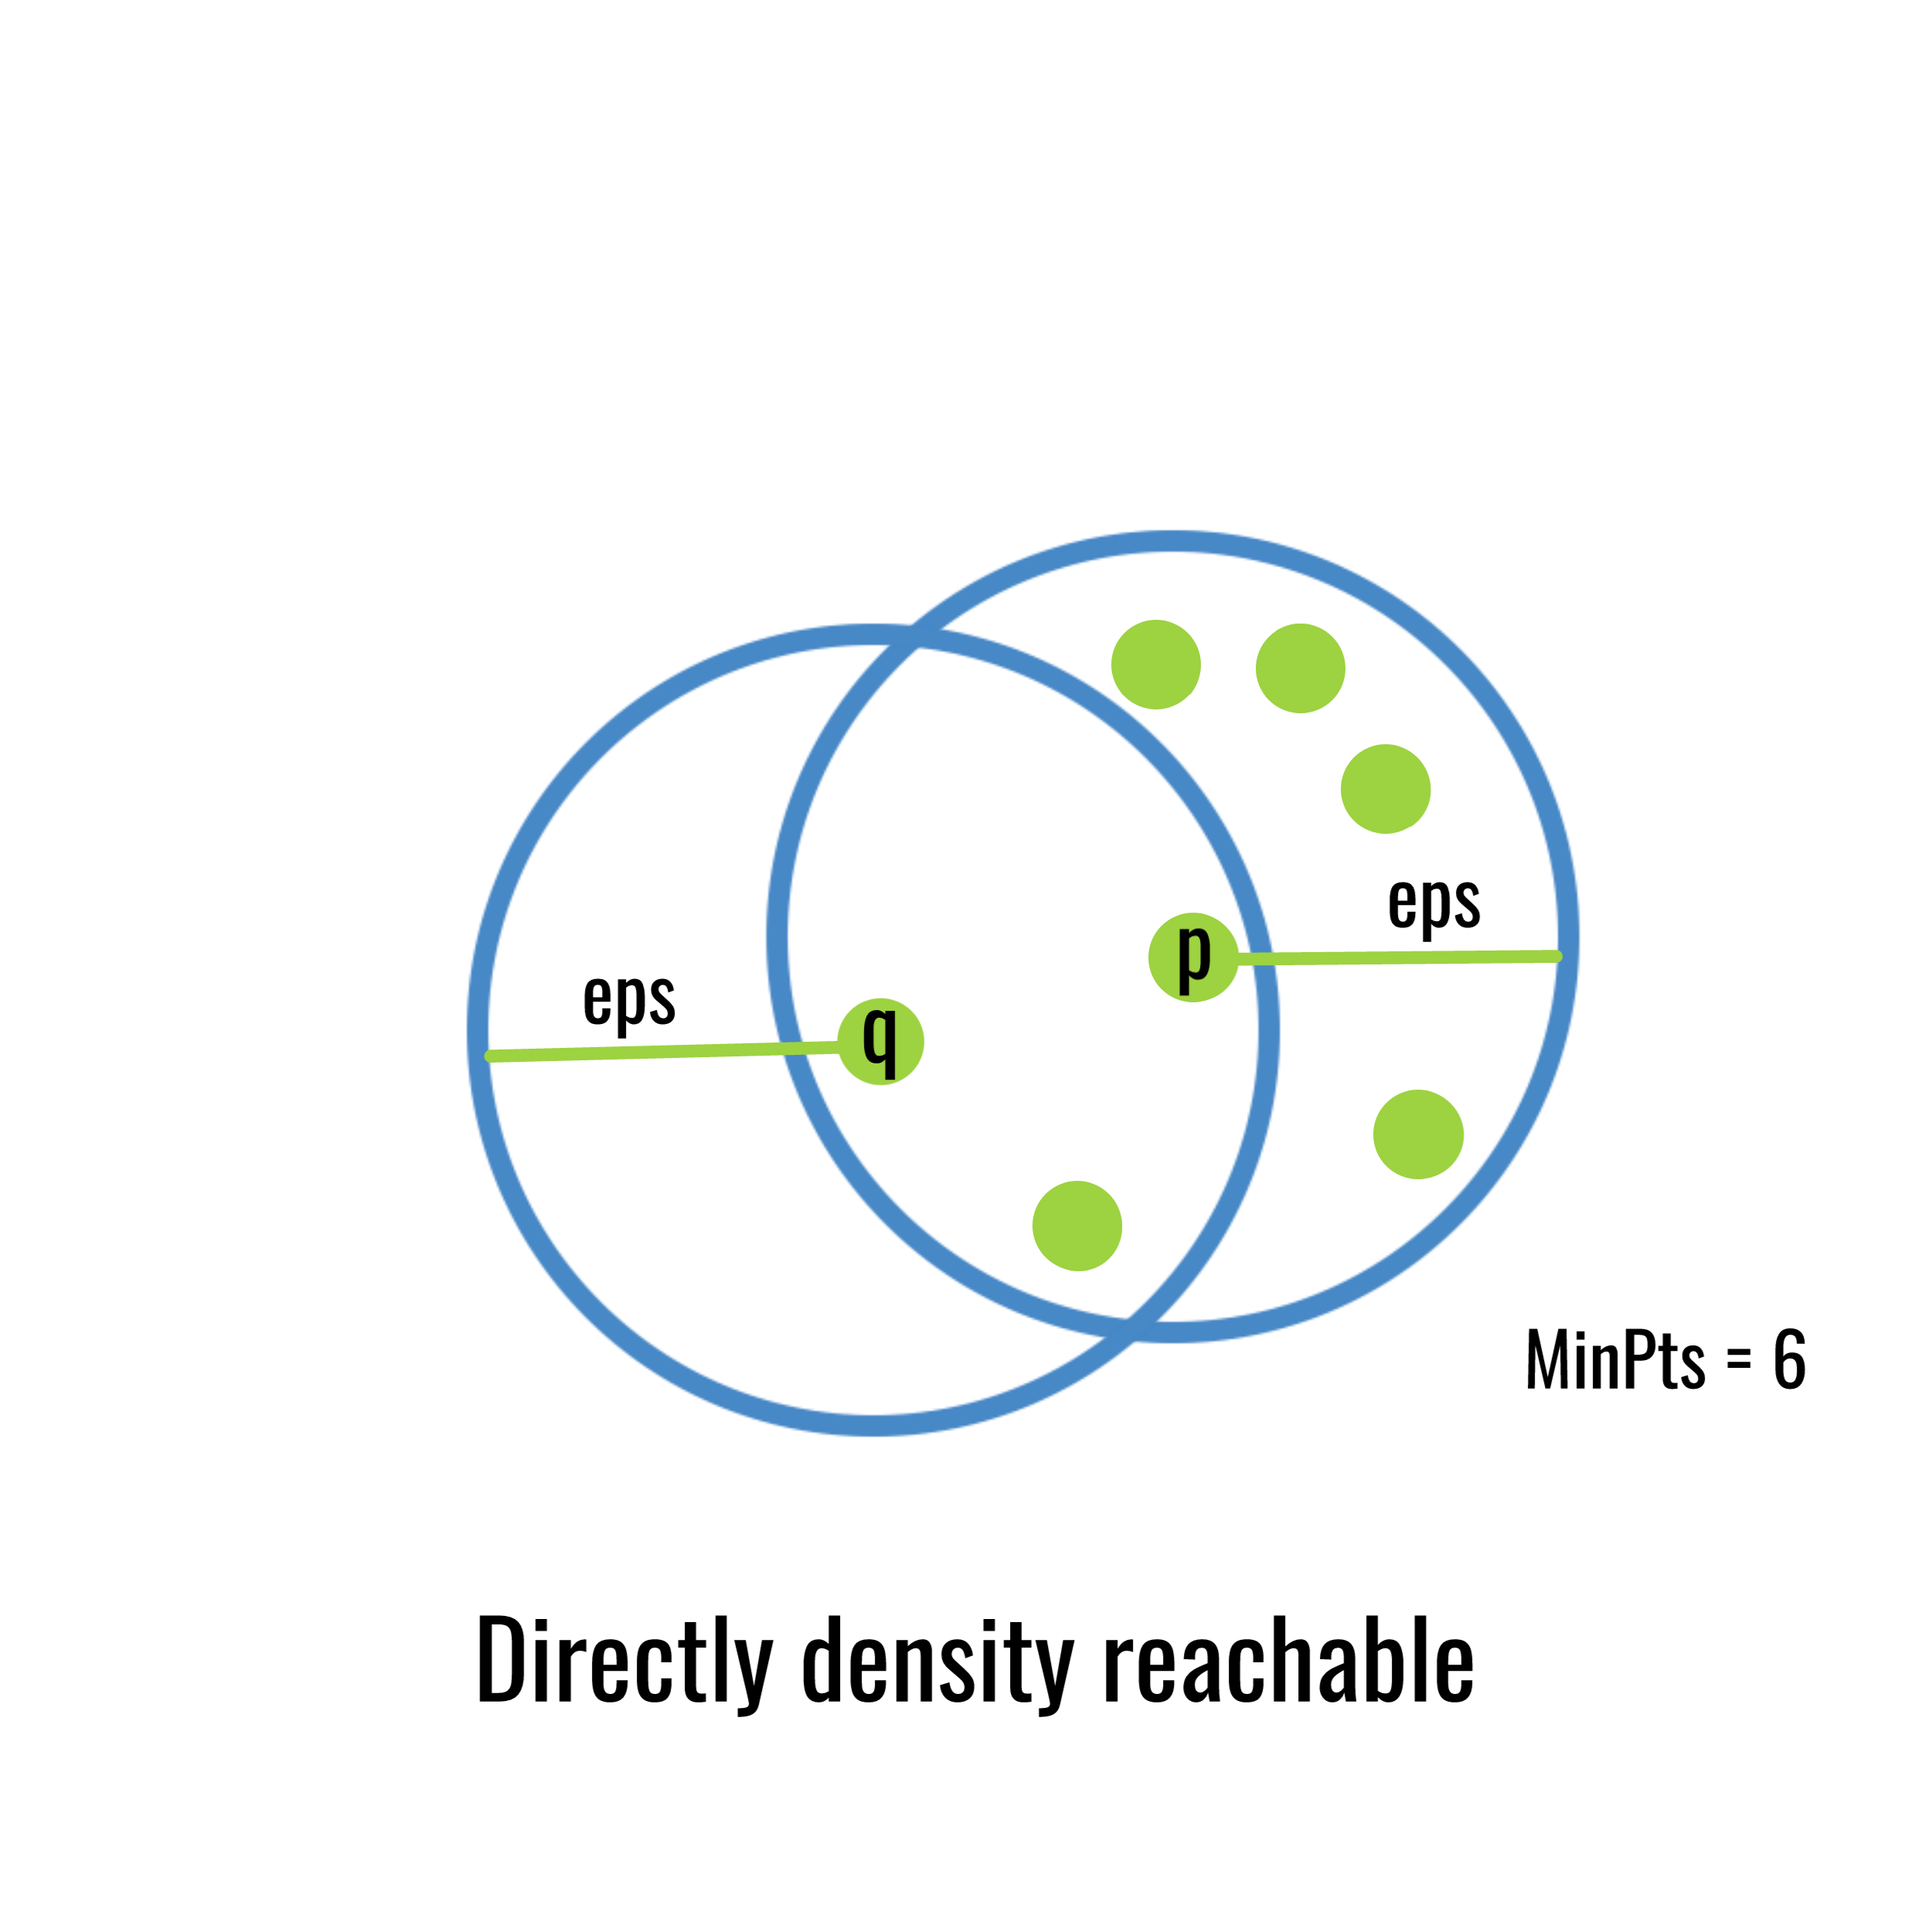


In [167]:
#DBSCAN
#Density-Based Spatial Clustering of 
#Applications with Noise. Finds core samples of
#high density and expands clusters from them. 
#Good for data which contains clusters of similar density.

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [168]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [173]:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
#print(
#   "Adjusted Mutual Information: %0.3f"
#   % metrics.adjusted_mutual_info_score(labels_true, labels)
#)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Estimated number of noise points: 120
Silhouette Coefficient: 0.308


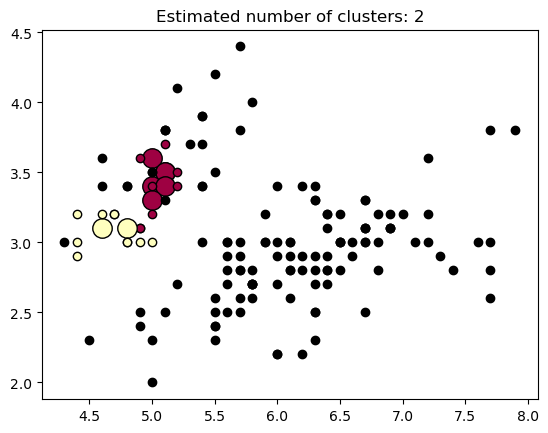

In [174]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()